In [12]:
include("../code/bp_full.jl")
include("../../telegram/notifications.jl")
using Base.Threads
nthreads()

22

In [17]:
function bp_dec(f1, f2, n, H; Tmax=1, fair_decimation=true, verbose=true)
    f3 = 1 - f1 -f2
    Lambda = [f1,f2,f3]
    K = [0,0,1]
    nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
    m = Int(nedges/3)
    s = rand((-1,1), n)
    efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
    bp = bp_full(n, m, nedges, Lambda, K, efield)
    B, indep = findbasis_slow(Array(bp.H))
    R = size(B,2)/n
    dist = decimate!(bp, efield, indep, s, B, maxiter=10^3, Tmax=Tmax, tol=1e-5, 
        fair_decimation=fair_decimation, verbose=verbose) 
    dist, bp, R
end

bp_dec (generic function with 1 method)

In [18]:
f1 = 1/100
n = 600
H = 3
f2s = [.35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95]
f2s = 0.35:0.07:0.95
navg = 2
Tmax = 2
D_bp = [zeros(navg) for f2 in f2s]
R_bp = zeros(length(f2s))
@telegram "BP Full (BP+dec)" for i in eachindex(f2s)
    println("#### Rate $i of $(length(f2s))")
    for j in 1:navg
        D_bp[i][j], bp, R_bp[i] = bp_dec(f1, f2s[i], n, H, Tmax=Tmax, verbose=false, fair_decimation=false)
    end
    flush(stdout)
end

#### Rate 1 of 9
#### Rate 2 of 9
#### Rate 3 of 9
#### Rate 4 of 9
#### Rate 5 of 9
#### Rate 6 of 9
#### Rate 7 of 9
#### Rate 8 of 9
#### Rate 9 of 9


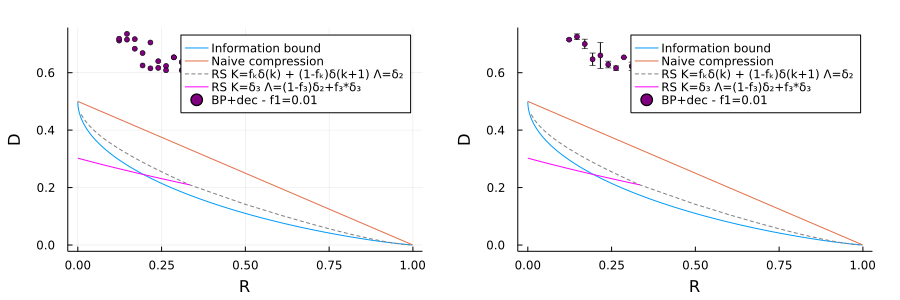

In [19]:
pl = plot_rdb(; f3=true)
for i in eachindex(R_bp)
    lab = i==1 ? "BP+dec - f1=$f1" : ""
    scatter!(pl, repeat([R_bp[i]], navg), D_bp[i], label=lab, ms=3, c=:purple)
end
pl2 = plot_rdb(; f3=true)
scatter!(pl2, R_bp, mean.(D_bp), label="BP+dec - f1=$f1", ms=3, c=:purple, yerr=std.(D_bp)/sqrt(navg), 
    grid=false, size=(400,400))
plot(pl, pl2, size=(900,300), margin=5Plots.mm)

In [36]:
using DelimitedFiles
open("bp_dec.txt", "w") do f   
   writedlm(f, [R_bp mean.(D_bp) std.(D_bp)/sqrt(navg)])
end

# Decimation

In [58]:
using OffsetArrays, Statistics, StatsBase
include("../code/bp_full.jl")
include("../code/bp.jl")

cb_decimation (generic function with 2 methods)

In [59]:
function bp_dec(f1, f2, n, H; Tmax=1)
    f3 = 1 - f1 -f2
    Lambda = [f1,f2,f3]
    K = [0,0,1]
    nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
    m = Int(nedges/3)
    s = rand((-1,1), n)
    efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
    bp = bp_full(n, m, nedges, Lambda, K, efield)
    B, indep = findbasis_slow(Array(bp.H))
    R = size(B,2)/n
    dist = decimate!(bp, efield, indep, s, B, maxiter=10^3, Tmax=Tmax, tol=1e-5, 
        fair_decimation=true) 
    dist, bp, R
end

bp_dec (generic function with 2 methods)

In [ ]:
f1 = 0.0
n = 1800
H = 3
f2s = [.35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95]
f2s = 0.35:0.07:0.95
navg = 15
D_bp2 = [zeros(navg) for f2 in f2s]
R_bp2 = zeros(length(f2s))
@telegram "BP Full - Decimation" for i in eachindex(f2s)
    println("#### Rate $i of $(length(f2s))")
    @threads for j in 1:navg
        D_bp2[i][j], bp, R_bp2[i] = bp_dec(f1, f2s[i], n, H, Tmax=30)
    end
    flush(stdout)
end

In [ ]:
using DelimitedFiles
open("bp_dec_zeroleaves.txt", "w") do f   
   writedlm(f, [R_bp2 mean.(D_bp2) std.(D_bp2)/sqrt(navg)])
end

In [50]:
using Base.Threads

f1 = 1/100
n = 1500
H = 3
f2 ∈ [.35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95]
# f2s = [.7, .75, .8, .85, .9, .95]
f2s2 = [.5, .55, .6, .65]
f2s4 = [.35, .4, .45]
# f2s = [.8, .9]
navg = 15
D4 = [zeros(navg) for f2 in f2s4]
R4 = zeros(length(f2s4))
for i in eachindex(f2s4)
    println("#### Rate $i of $(length(f2s4))")
   @threads for j in 1:navg
        D4[i][j], bp, R4[i] = bp_dec(f1, f2s4[i], n, H, Tmax=20)
    end
    flush(stdout)
end

#### Rate 1 of 3
Trial 1 of 20: 365 unsat. Dist = 0.447
Trial 1 of 20: 338 unsat. Dist = 0.437
Trial 1 of 20: 308 unsat. Dist = 0.461
Trial 1 of 20: 338 unsat. Dist = 0.454
Trial 1 of 20: 286 unsat. Dist = 0.461
Trial 1 of 20: 318 unsat. Dist = 0.46
Trial 1 of 20: 259 unsat. Dist = 0.442
Trial 1 of 20: 330 unsat. Dist = 0.437
Trial 2 of 20: 340 unsat. Dist = 0.413
Trial 2 of 20: 304 unsat. Dist = 0.448
Trial 2 of 20: 308 unsat. Dist = 0.445
Trial 2 of 20: 284 unsat. Dist = 0.459
Trial 2 of 20: 343 unsat. Dist = 0.437
Trial 2 of 20: 297 unsat. Dist = 0.437
Trial 2 of 20: 322 unsat. Dist = 0.443
Trial 2 of 20: 283 unsat. Dist = 0.457
Trial 3 of 20: 301 unsat. Dist = 0.438
Trial 3 of 20: 324 unsat. Dist = 0.469
Trial 3 of 20: 320 unsat. Dist = 0.447
Trial 3 of 20: 322 unsat. Dist = 0.45
Trial 3 of 20: 339 unsat. Dist = 0.442
Trial 3 of 20: 351 unsat. Dist = 0.433
Trial 3 of 20: 298 unsat. Dist = 0.432
Trial 3 of 20: 304 unsat. Dist = 0.43
Trial 4 of 20: 317 unsat. Dist = 0.443
Trial 4 of 

Trial 14 of 20: 352 unsat. Dist = 0.424
Trial 16 of 20: 291 unsat. Dist = 0.442
Trial 16 of 20: 314 unsat. Dist = 0.471
Trial 16 of 20: 322 unsat. Dist = 0.43
Trial 16 of 20: 329 unsat. Dist = 0.462
Trial 16 of 20: 350 unsat. Dist = 0.44
Trial 16 of 20: 346 unsat. Dist = 0.451
Trial 15 of 20: 338 unsat. Dist = 0.46
Trial 17 of 20: 361 unsat. Dist = 0.46
Trial 17 of 20: 303 unsat. Dist = 0.468
Trial 17 of 20: 278 unsat. Dist = 0.433
Trial 17 of 20: 327 unsat. Dist = 0.441
Trial 17 of 20: 383 unsat. Dist = 0.442
Trial 17 of 20: 320 unsat. Dist = 0.451
Trial 16 of 20: 311 unsat. Dist = 0.434
Trial 18 of 20: 334 unsat. Dist = 0.439
Trial 18 of 20: 336 unsat. Dist = 0.458
Trial 18 of 20: 314 unsat. Dist = 0.426
Trial 18 of 20: 285 unsat. Dist = 0.432
Trial 18 of 20: 292 unsat. Dist = 0.463
Trial 18 of 20: 333 unsat. Dist = 0.441
Trial 17 of 20: 305 unsat. Dist = 0.453
Trial 19 of 20: 324 unsat. Dist = 0.461
Trial 19 of 20: 277 unsat. Dist = 0.439
Trial 19 of 20: 359 unsat. Dist = 0.435
Tria

Trial 15 of 20: 262 unsat. Dist = 0.455
Trial 15 of 20: 243 unsat. Dist = 0.45
Trial 15 of 20: 264 unsat. Dist = 0.439
Trial 15 of 20: 236 unsat. Dist = 0.468
Trial 16 of 20: 299 unsat. Dist = 0.439
Trial 16 of 20: 277 unsat. Dist = 0.421
Trial 16 of 20: 286 unsat. Dist = 0.468
Trial 16 of 20: 282 unsat. Dist = 0.465
Trial 16 of 20: 301 unsat. Dist = 0.456
Trial 16 of 20: 313 unsat. Dist = 0.461
Trial 16 of 20: 303 unsat. Dist = 0.444
Trial 17 of 20: 298 unsat. Dist = 0.459
Trial 17 of 20: 282 unsat. Dist = 0.477
Trial 17 of 20: 306 unsat. Dist = 0.441
Trial 17 of 20: 251 unsat. Dist = 0.44
Trial 17 of 20: 261 unsat. Dist = 0.441
Trial 17 of 20: 348 unsat. Dist = 0.44
Trial 17 of 20: 306 unsat. Dist = 0.435
Trial 18 of 20: 265 unsat. Dist = 0.438
Trial 18 of 20: 262 unsat. Dist = 0.462
Trial 18 of 20: 318 unsat. Dist = 0.437
Trial 18 of 20: 255 unsat. Dist = 0.441
Trial 18 of 20: 270 unsat. Dist = 0.463
Trial 18 of 20: 279 unsat. Dist = 0.435
Trial 18 of 20: 262 unsat. Dist = 0.433
Tri

Trial 15 of 20: 247 unsat. Dist = 0.415
Trial 15 of 20: 269 unsat. Dist = 0.445
Trial 15 of 20: 228 unsat. Dist = 0.427
Trial 15 of 20: 299 unsat. Dist = 0.432
Trial 15 of 20: 263 unsat. Dist = 0.453
Trial 15 of 20: 228 unsat. Dist = 0.439
Trial 16 of 20: 267 unsat. Dist = 0.455
Trial 16 of 20: 294 unsat. Dist = 0.445
Trial 16 of 20: 237 unsat. Dist = 0.432
Trial 16 of 20: 228 unsat. Dist = 0.415
Trial 16 of 20: 240 unsat. Dist = 0.433
Trial 16 of 20: 249 unsat. Dist = 0.435
Trial 16 of 20: 263 unsat. Dist = 0.424
Trial 17 of 20: 300 unsat. Dist = 0.431
Trial 17 of 20: 240 unsat. Dist = 0.441
Trial 17 of 20: 295 unsat. Dist = 0.436
Trial 17 of 20: 258 unsat. Dist = 0.435
Trial 17 of 20: 198 unsat. Dist = 0.423
Trial 17 of 20: 228 unsat. Dist = 0.409
Trial 17 of 20: 214 unsat. Dist = 0.423
Trial 18 of 20: 265 unsat. Dist = 0.453
Trial 18 of 20: 218 unsat. Dist = 0.453
Trial 18 of 20: 218 unsat. Dist = 0.441
Trial 18 of 20: 257 unsat. Dist = 0.439
Trial 18 of 20: 245 unsat. Dist = 0.427


In [51]:
R5 = vcat(R3, R4)
D5 = vcat(D3, D4)

13-element Vector{Vector{Float64}}:
 [0.24, 0.242, 0.24266666666666667, 0.23733333333333334, 0.24333333333333335, 0.246, 0.24866666666666667, 0.23733333333333334, 0.23866666666666667, 0.234, 0.24533333333333332, 0.23333333333333334, 0.242, 0.24066666666666667, 0.24066666666666667]
 [0.234, 0.24066666666666667, 0.23466666666666666, 0.22533333333333333, 0.234, 0.234, 0.23, 0.23866666666666667, 0.234, 0.22866666666666666, 0.24333333333333335, 0.23466666666666666, 0.232, 0.23466666666666666, 0.246]
 [0.23866666666666667, 0.22333333333333333, 0.22933333333333333, 0.228, 0.22933333333333333, 0.23133333333333334, 0.24133333333333334, 0.228, 0.234, 0.226, 0.22933333333333333, 0.22866666666666666, 0.228, 0.226, 0.23066666666666666]
 [0.22533333333333333, 0.22133333333333333, 0.22266666666666668, 0.222, 0.23066666666666666, 0.21866666666666668, 0.22933333333333333, 0.22266666666666668, 0.23466666666666666, 0.224, 0.22133333333333333, 0.226, 0.226, 0.23666666666666666, 0.22533333333333333]
 [0.21

In [55]:
pl = plot_rdb(; f3=true)
for i in eachindex(R5)
    lab = i==1 ? "BP+dec - f1=$f1" : ""
    scatter!(pl, repeat([R5[i]], navg), D5[i], label=lab, ms=3, c=:purple)
end
plot(pl)

LoadError: UndefVarError: R5 not defined

In [60]:
R5

13-element Vector{Float64}:
 0.24
 0.25666666666666665
 0.2733333333333333
 0.29
 0.30666666666666664
 0.3233333333333333
 0.17333333333333334
 0.19
 0.20666666666666667
 0.22333333333333333
 0.12333333333333334
 0.14
 0.15666666666666668

In [56]:
pl2 = plot_rdb(; f3=true)
scatter!(pl2, R5, mean.(D5), label="BP+dec - f1=$f1", ms=3, c=:purple, yerr=std.(D5)/sqrt(navg))
plot(pl, pl2, size=(900,300), margin=5Plots.mm)

LoadError: UndefVarError: D5 not defined

In [57]:
pl = plot_rdb(; f3=true)
for i in eachindex(R)
    lab = i==1 ? "BP+dec - f1=$f1" : ""
    scatter!(pl, repeat([R[i]], navg), D[i], label=lab, ms=3, c=:purple)
end
# xlims!((0.24,0.30)); ylims!((0.18,0.30))
plot(pl)

LoadError: UndefVarError: D not defined

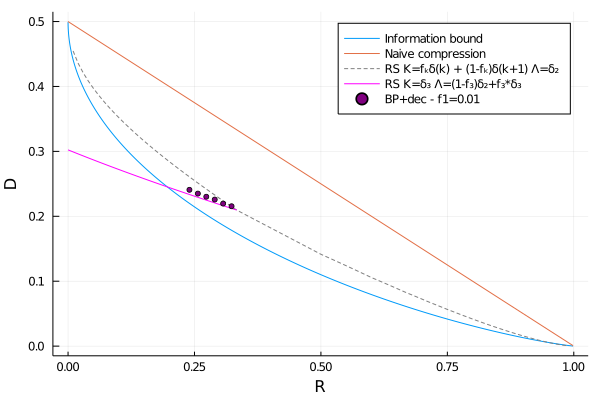

In [40]:
plot_rdb(; f3=true)
scatter!(R, mean.(D), label="BP+dec - f1=$f1", ms=3, c=:purple)

## Average over more than one instance

In [18]:
m = factorial(5)*11*2
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
Hs = [1]
navg = 10
dist_f3 = [Float64[] for _ in eachindex(Hs)]
for j in 1:navg
    println("#### Round $j of $navg")
    bp = bp_full(n, m, nedges, Λ, K)
    B, freevars = findbasis_slow(Array(bp.H))
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs)
        println("------ H=", round(H,digits=4), ". ", i, " of ", length(Hs), " ------")
        efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
        _,_,d = decimate!(bp, efield, freevars, s, maxiter=1000, Tmax=1, tol=1e-4)  
        isnan(d) || push!(dist_f3[i], d) 
    end
end

#### Round 1 of 10


Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


------ H=1.0. 1 of 1 ------


LoadError: InterruptException:

In [ ]:
println("Avg over $navg instances")
colors = cgrad(:heat, length(Hs)+1, categorical = true)
pl_f3 = plot_rdb()
for (i,H) in enumerate(Hs)
    scatter!(pl_f3, [R], [mean(dist_f3[i])], 
        yerr = [std(dist_f3[i])/sqrt(length(dist_f3[i]))],
        label="BP - f_3=$(round(r,digits=1)) - H=$(round(H,sigdigits=2))", mc=colors[i], ms=4)
end
plot(pl_f3, size=(600,400), legend=:topright)
xlims!((0.24,0.30)); ylims!((0.22,0.26))

# With reinforcement

In [466]:
f1 = 0.01
f3 = 0.4
Λ = OffsetVector([0,f1,1-f1-f3,f3], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
mK = sum(k*K[k] for k=eachindex(K))
mΛ = sum(d*Λ[d] for d=eachindex(Λ))
α = mΛ/mK
R=1-α
# Single instance
n = 100*3*7*2
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Λ)), digits=8))
m = Int(nedges/3)
Ht = ldpc_matrix(n, m, nedges, Λ, K)
H = permutedims(Ht)
x0 = rand((0,1), size(H,2))
s = (-1).^x0
h = 1.0
efield = [(exp(h*ss),exp(-h*ss)) for ss in s]
efield = [(h*ss,-h*ss) for ss in s]
bp = BPFull(H, efield);

In [467]:
err,iters = iteration!(bp::BPFull; maxiter=2000, tol=1e-15, damp=0.5, rein=5e-4,
    update_f! = update_factor_ms!, update_v! = update_var_ms!) 

(3.2089551064271164e8, 2000)

In [468]:
nunsat, ovl, dist = performance(bp,s)

(0, 0.4733333333333334, 0.2633333333333333)

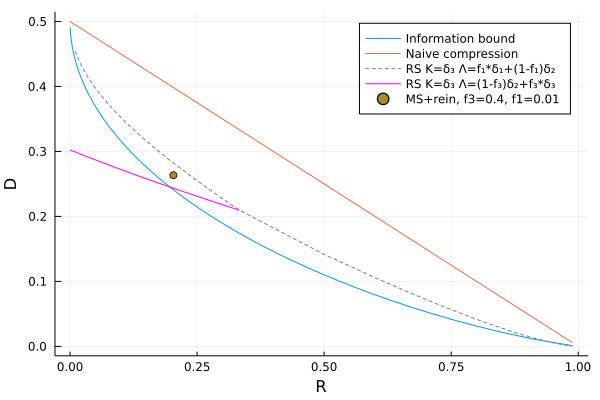

In [472]:
plot_rdb()
scatter!([R], [dist], label="MS+rein, f3=$f3, f1=$f1")

In [401]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = [0,1-r,r]
K = [0,0,1]
nedges = 3m
H = 1
s = rand((-1,1), n)
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = bp_full(n, m, nedges, Λ, K, efield)
B, freevars = findbasis_slow(Array(bp.H));

In [402]:
maxiter = 5*10^4
cb(it, ε, bp) = (mod(it,10^3)==0 && println("Iter $it finished"); false)
ε, iters = iteration_quick!(bp; maxiter=maxiter, tol=1e-12, damp=0.5, rein=10/maxiter)

(0.19463563264200273, 50000)

In [403]:
performance(bp,s)

(2, 0.5333333333333333, 0.23333333333333334)

In [404]:
x = argmax.(bp.belief) .== 2
σ = fix_indep!(x, B, freevars)
dd = distortion(σ, s)

0.3

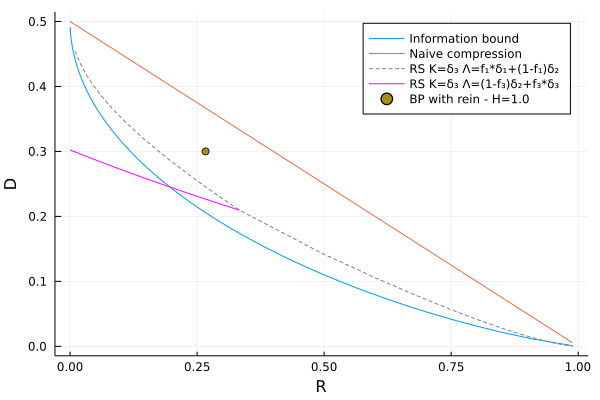

In [405]:
pl_r = plot_rdb()
scatter!(pl_r, [R], [dd], label="BP with rein - H=$(round(H,sigdigits=2))", ms=4)
plot(pl_r, size=(600,400), legend=:topright)
# xlims!((0.24,0.30)); ylims!((0.22,0.26))

In [406]:
i = 1
f3 = [0.1]
R = 1/3*(1 .- f3)
Lambda = [0,1-f3[i],f3[i]]
P = [0,0,1]
m, n, nedges, K, Λ = valid_degrees(P, Lambda, 100000)
# @assert isapprox(1-m/n, R[i], atol=1e-8)
# bp = bp_full(n, m, nedges, Λ, K)

(7, 10, 21, [0.0, 0.0, 1.0], [0.0, 0.9, 0.1])

In [350]:
f3 = 0:0.01:0.4
D = zero(f3)
R = 1/3*(1 .- f3)
@showprogress for i in eachindex(D)
    Lambda = [0,1-f3[i],f3[i]]
    P = [0,0,1]
    m, n, nedges, K, Λ = valid_degrees(P, Lambda, 2*3*5*7)
    bp = bp_full(n,m,nedges,Λ,K)
    K,Λ = 
end

Λ = [0.0, 1.0, 0.0]


Progress:   2%|█                                        |  ETA: 0:00:50

Λ = [0.0, 0.99, 0.01]


Progress:   5%|██                                       |  ETA: 0:01:36

Λ = [0.0, 0.98, 0.02]


Progress:   7%|███                                      |  ETA: 0:01:48

Λ = [0.0, 0.97, 0.03]


Progress:  10%|████                                     |  ETA: 0:01:48

Λ = [0.0, 0.96, 0.04]


Progress:  12%|█████                                    |  ETA: 0:01:48

Λ = [0.0, 0.95, 0.05]


Progress:  15%|██████                                   |  ETA: 0:01:46

Λ = [0.0, 0.94, 0.06]


Progress:  17%|███████                                  |  ETA: 0:01:41

Λ = [0.0, 0.9299999999999999, 0.07]


Progress:  20%|████████                                 |  ETA: 0:01:38

Λ = [0.0, 0.92, 0.08]


Progress:  22%|█████████                                |  ETA: 0:01:36

Λ = [0.0, 0.91, 0.09]


Progress:  24%|██████████                               |  ETA: 0:01:31

Λ = [0.0, 0.9, 0.1]


Progress:  27%|███████████                              |  ETA: 0:01:27

Λ = [0.0, 0.89, 0.11]


Progress:  29%|████████████                             |  ETA: 0:01:24

Λ = [0.0, 0.88, 0.12]


Progress:  32%|█████████████                            |  ETA: 0:01:21

Λ = [0.0, 0.87, 0.13]


Progress:  34%|██████████████                           |  ETA: 0:01:19

Λ = [0.0, 0.86, 0.14]


Progress:  37%|███████████████                          |  ETA: 0:01:17

Λ = [0.0, 0.85, 0.15]


Progress:  39%|████████████████                         |  ETA: 0:01:14

Λ = [0.0, 0.84, 0.16]


Progress:  41%|█████████████████                        |  ETA: 0:01:11

Λ = [0.0, 0.83, 0.17]


Progress:  44%|██████████████████                       |  ETA: 0:01:09

Λ = [0.0, 0.8200000000000001, 0.18]


Progress:  46%|███████████████████                      |  ETA: 0:01:07

Λ = [0.0, 0.81, 0.19]


Progress:  49%|████████████████████                     |  ETA: 0:01:04

Λ = [0.0, 0.8, 0.2]


Progress:  51%|█████████████████████                    |  ETA: 0:01:01

Λ = [0.0, 0.79, 0.21]


Progress:  54%|██████████████████████                   |  ETA: 0:00:58

Λ = [0.0, 0.78, 0.22]


Progress:  56%|███████████████████████                  |  ETA: 0:00:55

Λ = [0.0, 0.77, 0.23]


Progress:  59%|████████████████████████                 |  ETA: 0:00:53

Λ = [0.0, 0.76, 0.24]


Progress:  61%|█████████████████████████                |  ETA: 0:00:50

Λ = [0.0, 0.75, 0.25]


Progress:  63%|██████████████████████████               |  ETA: 0:00:47

Λ = [0.0, 0.74, 0.26]


Progress:  66%|███████████████████████████              |  ETA: 0:00:44

Λ = [0.0, 0.73, 0.27]


Progress:  68%|████████████████████████████             |  ETA: 0:00:41

Λ = [0.0, 0.72, 0.28]


Progress:  71%|█████████████████████████████            |  ETA: 0:00:38

Λ = [0.0, 0.71, 0.29]


Progress:  73%|██████████████████████████████           |  ETA: 0:00:35

Λ = [0.0, 0.7, 0.3]


Progress:  76%|███████████████████████████████          |  ETA: 0:00:32

Λ = [0.0, 0.69, 0.31]


Progress:  78%|████████████████████████████████         |  ETA: 0:00:29

Λ = [0.0, 0.6799999999999999, 0.32]


Progress:  80%|█████████████████████████████████        |  ETA: 0:00:25

Λ = [0.0, 0.6699999999999999, 0.33]


Progress:  83%|██████████████████████████████████       |  ETA: 0:00:22

Λ = [0.0, 0.6599999999999999, 0.34]


Progress:  85%|███████████████████████████████████      |  ETA: 0:00:19

Λ = [0.0, 0.65, 0.35]


Progress:  88%|████████████████████████████████████     |  ETA: 0:00:16

Λ = [0.0, 0.64, 0.36]


Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:13

Λ = [0.0, 0.63, 0.37]


Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:10

Λ = [0.0, 0.62, 0.38]


Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:06

Λ = [0.0, 0.61, 0.39]


Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:03

Λ = [0.0, 0.6, 0.4]


Progress: 100%|█████████████████████████████████████████| Time: 0:02:12


In [357]:
[R ]

41×2 Matrix{Float64}:
 0.333333  0.333333
 0.33      0.33
 0.326667  0.326667
 0.323333  0.323333
 0.32      0.32
 0.316667  0.316667
 0.313333  0.313333
 0.31      0.31
 0.306667  0.306667
 0.303333  0.303333
 0.3       0.3
 0.296667  0.296667
 0.293333  0.293333
 ⋮         
 0.236667  0.236667
 0.233333  0.233333
 0.23      0.23
 0.226667  0.226667
 0.223333  0.223333
 0.22      0.22
 0.216667  0.216667
 0.213333  0.213333
 0.21      0.21
 0.206667  0.206667
 0.203333  0.203333
 0.2       0.2

In [351]:
i = 21
Λ = [0,1-f3[i],f3[i]]
RS([0,0,1], Λ, N=300, tol=1e-5, maxiter=100)

(0.2666666666666666, 0.21425573166477585, [1.5063132044451507e-7, 5.6387524630032856e-8, 5.380821093312203e-8, 5.417880905884143e-8, 5.4618779955471945e-8, 5.506667461000824e-8, 5.5521599541667426e-8, 5.598361863538798e-8, 5.645280946483648e-8, 5.692925359618384e-8  …  5.692925359618384e-8, 5.645280946483648e-8, 5.598361863538798e-8, 5.5521599541667426e-8, 5.506667461000824e-8, 5.4618779955471945e-8, 5.417880905884143e-8, 5.380821093312203e-8, 5.6387524630032856e-8, 1.5063132044451507e-7])

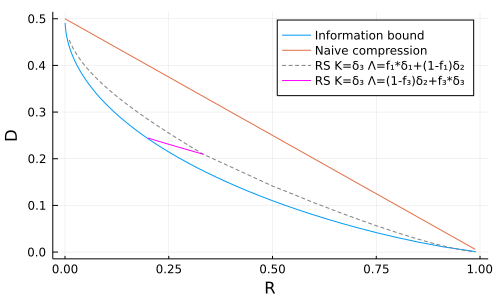

In [354]:
pp = plot_rdb(f3=false)
plot!(R, D, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃", color=:magenta, size=(500,300))
# xlims!((0.23,0.35)); ylims!((0.2,0.25))

## Leaves

In [1]:
function buildgraph(R, f1, f3; tol=1e-2, B=0) 
    f2 = 1.0-f1-f3
    α = 1-R
    k = floor(Int, (2-f1+f3)/α)
    s = k+1-(2-f1+f3)/α
    K = [fill(0,k-1); s; 1-s]
    Λ = [f1, f2, f3]
    m, n, nedges, rho, lambda = valid_degrees(K,Λ,3*5*7, B=1)
    if B==0
        B = 10^max(0, 3-round(Int,log10(n)))
    end
    m, n, nedges, rho, lambda = valid_degrees(K,Λ,3*5*7, B=B)
    @assert isapprox(Λ, lambda, atol=tol)
    @assert isapprox(lambda[1], f1, atol=tol)
    @assert isapprox(R, rate(lambda, rho), atol=tol)
    m, n, nedges, rho, lambda
end

function bp_dec(n, m, nedges, rho, lambda, β; Tmax=1, fair_decimation=true,
        verbose=true)
    s = rand((-1,1), n)
    efield = [(exp(β*ss),exp(-β*ss)) for ss in s]
    bp = bp_full(n, m, nedges, lambda, rho, efield)
    B, indep = findbasis_slow(Array(bp.H))
    R = size(B,2)/n
    dist = decimate!(bp, efield, indep, s, B, maxiter=10^3, Tmax=Tmax, tol=1e-5, 
        fair_decimation=fair_decimation, verbose=verbose) 
    dist, bp, R
end

bp_dec (generic function with 1 method)

In [4]:
R = 0.5
f3 = 0.2
f1s = [0, 0.01, 0.02, 0.03]
Bs = [200, 10, 10, 30]

for (i,f1) in enumerate(f1s)
    m, n, nedges, rho, lambda = buildgraph(R, f1, f3, B=Bs[i])
    @show f1, n
end

(f1, n) = (0.0, 2000)
(f1, n) = (0.01, 2100)
(f1, n) = (0.02, 2100)
(f1, n) = (0.03, 2100)


In [ ]:
β = 3.0
navg = 500
Tmax = 30
D_bp = [zeros(navg) for _ in f1s]
R_bp = zeros(length(f1s))

@telegram "BP Full" for i in eachindex(f1s)
    prog = Progress(length(f1s))
    println("Degree profile $i of ", length(f1s))
    m, n, nedges, rho, lambda = buildgraph(R, f1s[i], f3)
    @threads for j in 1:navg
        D_bp[i][j], _, R_bp[i] = bp_dec(n, m, nedges, rho, lambda, β; Tmax=Tmax)
        next!(prog, showvalues=[(:i,i)])
    end 
end

In [ ]:
D_bp_avg = mean.(D_bp)
# D_bp_std = std.(D_bp) / sqrt(navg)